# Importing the libraries

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [192]:
df=pd.read_csv('instagrammers.csv')
df

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
0,cristiano,1,Sports with a ball,462.9M,India,5.5M,6.6M
1,leomessi,2,Sports with a ballFamily,347.2M,Argentina,3.6M,4.8M
2,kendalljenner,3,ModelingFashion,247.6M,United States,3M,4.9M
3,arianagrande,4,Music,321.4M,United States,2.4M,3.4M
4,zendaya,5,Cinema & Actors/actressesFashion,147M,United States,4.3M,5.8M
...,...,...,...,...,...,...,...
995,nimratkhairaofficial,996,Music,8M,India,211.1K,261.8K
996,hanhyojoo222,997,TravelCinema & Actors/actresses,4M,Indonesia,434.2K,518.2K
997,memphisdepay,998,Sports with a ball,15M,France,76.4K,135.5K
998,arminzareeiofficial,999,NaN,9.8M,Iran,135.4K,214K


About the file
-------------------------------------------------------------
Name: Name of the account
Rank: Overall rank in the world.
Category: Stream of the account (Music, Games, etc..)
Followers: Number of followers
Audience Country: country of the majority of audience.
Authentic Engagement: real people genuinely interacting with your content
Engagement Avg.: how much people are interacting with your content on average

# Understanding the dataset

In [193]:
df.columns

Index(['Name', 'Rank', 'Category', 'Followers', 'Audience Country',
       'Authentic Engagement', 'Engagement Avg.'],
      dtype='object')

# Dataset Info

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  1000 non-null   object
 1   Rank                  1000 non-null   int64 
 2   Category              916 non-null    object
 3   Followers             1000 non-null   object
 4   Audience Country      986 non-null    object
 5   Authentic Engagement  1000 non-null   object
 6   Engagement Avg.       1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


Observation:
--------------------------------------------------------
Category column has 84 missing values (mode)
Audience Country column has 14 missing values (mode)

# Check how many nulls you have

In [195]:
df.isnull().sum()

Name                     0
Rank                     0
Category                84
Followers                0
Audience Country        14
Authentic Engagement     0
Engagement Avg.          0
dtype: int64

In [196]:
df[['Category','Audience Country']].isnull().sum()

Category            84
Audience Country    14
dtype: int64

# Data Cleaning

# 1.Handling the null values

 Fill missing values

In [197]:
df['Category']=df['Category'].fillna('Unknown')
df['Audience Country']=df['Audience Country'].fillna('Unknown')

# Converting Data Type

In [198]:
df['Followers']=df['Followers'].str.replace('M','').astype(float)
df

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
0,cristiano,1,Sports with a ball,462.9,India,5.5M,6.6M
1,leomessi,2,Sports with a ballFamily,347.2,Argentina,3.6M,4.8M
2,kendalljenner,3,ModelingFashion,247.6,United States,3M,4.9M
3,arianagrande,4,Music,321.4,United States,2.4M,3.4M
4,zendaya,5,Cinema & Actors/actressesFashion,147.0,United States,4.3M,5.8M
...,...,...,...,...,...,...,...
995,nimratkhairaofficial,996,Music,8.0,India,211.1K,261.8K
996,hanhyojoo222,997,TravelCinema & Actors/actresses,4.0,Indonesia,434.2K,518.2K
997,memphisdepay,998,Sports with a ball,15.0,France,76.4K,135.5K
998,arminzareeiofficial,999,Unknown,9.8,Iran,135.4K,214K


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  1000 non-null   object 
 1   Rank                  1000 non-null   int64  
 2   Category              1000 non-null   object 
 3   Followers             1000 non-null   float64
 4   Audience Country      1000 non-null   object 
 5   Authentic Engagement  1000 non-null   object 
 6   Engagement Avg.       1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [200]:
def convert_to_int(value):
    if isinstance(value, str): # isinstance is used to check the value sting or not
        value = value.strip() # strip->It removes extra spaces from the beginning and end of a string.
        if value.endswith('K'):
            return int(float(value[:-1]) * 1_000) # value[:-1]->if we give :-1 it removes last char (ex: if "1.3k" it remove last 'k' char ext....)
        elif value.endswith('M'):
            return int(float(value[:-1]) * 1_000_000)
        elif value.isdigit(): # isdigit()->it is used to check if all the characters in a string are digits(numaric char)
            return int(value)
    return None  # for empty or invalid values

df['Authentic Engagement']=df['Authentic Engagement'].apply(convert_to_int)

In [201]:
def convert_to_int1(value):
    if isinstance(value, str): # isinstance is used to check the value sting or not
        value = value.strip()  # strip->It removes extra spaces from the beginning and end of a string.
        if value.endswith('K'):
            return int(float(value[:-1]) * 1_000) # value[:-1]->if we give :-1 it removes last char (ex: if "1.3k" it remove last 'k' char ext....)
        elif value.endswith('M'):
            return int(float(value[:-1]) * 1_000_000) 
        elif value.isdigit(): # isdigit()->it is used to check if all the characters in a string are digits(numaric char)
            return int(value)
    return None  # for empty or invalid values

df['Engagement Avg.']=df['Engagement Avg.'].apply(convert_to_int1)

# Data Transformation

# 1. Renaming the column name

In [202]:
df=df.rename(columns={'Name':'Users_Name'})

In [203]:
df=df.rename(columns={'Authentic Engagement': 'Real_Audience_Interaction'})

In [204]:
df=df.rename(columns={'Engagement Avg.': 'People_Interaction_Avg'})

# understanding the dataset

In [205]:
df.columns

Index(['Users_Name', 'Rank', 'Category', 'Followers', 'Audience Country',
       'Real_Audience_Interaction', 'People_Interaction_Avg'],
      dtype='object')

# Rearranging the columns

In [206]:
column_index=[0,2,3,5,6,1,4]
df=df[df.columns[[0,2,3,5,6,1,4]]]
df.head(2)

,Users_Name,Category,Followers,Real_Audience_Interaction,People_Interaction_Avg,Rank,Audience Country
0,cristiano,Sports with a ball,462.9,5500000,6600000,1,India
1,leomessi,Sports with a ballFamily,347.2,3600000,4800000,2,Argentina


# Analysis

# 1.How many influencers are in the dataset?

In [207]:
df.shape[0]

1000

Observation: This tells you how many influencers are being analyzed.

# 2.What are the top 5 most followed influencers?

In [208]:
df['Followers']=df['Followers'].str.replace('M','').astype(float)
df.sort_values(by='Followers', ascending=False).head(5)[['Users_Name','Followers']]

AttributeError: Can only use .str accessor with string values!

Observation: Helps identify who dominates the platform in terms of follower count.

# 3.Which countries have the most influencers in this list?

In [ ]:
df['Audience Country'].value_counts().head()

Audience Country
United States    277
India            159
Brazil           145
Indonesia        136
Mexico            40
Name: count, dtype: int64

Observation: Gives a regional breakdown—where most of the top influencers' audiences are from.

# 4.What is the average follower count of these influencers?

In [ ]:
df['Followers'].mean()

np.float64(26.044600000000003)

Observation: Provides insight into the general popularity level of influencers on this list.

In [ ]:
df.head(0)

,Users_Name,Category,Followers,Real_Audience_Interaction,People_Interaction_Avg,Rank,Audience Country


# 5.Which category appears most frequently?

In [ ]:
df['Category'].value_counts().idxmax()

'Music'

# 6.Who is the top-ranked Instagrammer?

In [ ]:
top_ranked=df[df['Rank']==1]
top_ranked[['Users_Name','Followers','Real_Audience_Interaction','People_Interaction_Avg']]

,Users_Name,Followers,Real_Audience_Interaction,People_Interaction_Avg
0,cristiano,462.9,5500000,6600000


Observation: He has the highest follower count at 462.9M and the highest engagement too.

# 7.What category does kendalljenner belong to?

In [ ]:
kendall_category=df[df['Users_Name']=='kendalljenner']['Category'].values[0]
kendall_category

'ModelingFashion'

Observation: Kendall Jenner is in the modeling and fashion category with 247.6M followers, and her main audience is from the United States.

# 8.Which influencer has the main audience in Argentina?

In [ ]:
argentina_influencers = df[df['Audience Country'] == 'Argentina']
argentina_influencers[['Users_Name', 'Rank', 'Followers']].head(2)

,Users_Name,Rank,Followers
1,leomessi,2,347.2
76,paulodybala,77,47.7


Observation: As an Argentinian footballer, it makes sense that his largest audience is from Argentina, and he ranks 2nd overall.

# 9.How many influencers are from the "Music" category among the top 5?

In [ ]:
top5_music=df.head(5)
top5_music['Category'].str.contains('Music').sum()

np.int64(1)

Observation: While music is a popular category, other categories like sports and fashion dominate the top 5.

# 10.What is the average engagement for zendaya?

In [ ]:
df[df['Users_Name']=='zendaya']['People_Interaction_Avg'].mean()

np.float64(5800000.0)

Observation: Zendaya has a strong engagement rate relative to her 147M followers, showing a highly active fanbase.

# 11.What is the average number of influencers per audience country?

In [ ]:
country_gp = df.groupby('Audience Country')['Users_Name'].count().sort_values(ascending=False)
country_gp.head(10)

Audience Country
United States    277
India            159
Brazil           145
Indonesia        136
Mexico            40
Spain             34
Russia            26
Argentina         23
Iran              21
Turkey            20
Name: Users_Name, dtype: int64

Observation: This helps identify which countries have the most top Instagram influencers.

# 12.What is the average rank of influencers per category?

In [ ]:
avg_rank=df.groupby('Category')['Rank'].mean().sort_values()
avg_rank.head(10)

Category
FashionBeauty                                  6.0
FashionModelingBeauty                          8.0
MusicBeauty                                   20.0
Art/ArtistsCinema & Actors/actressesMusic     26.0
Cinema & Actors/actressesFitness & Gym        41.0
LifestyleFashionClothing & Outfits            43.0
Clothing & OutfitsLifestyle                   44.0
ModelingLifestyleBeauty                       81.0
BeautyArt/ArtistsCinema & Actors/actresses    87.0
Sports with a ballFamily                      92.0
Name: Rank, dtype: float64

Observation: This shows which content categories tend to rank higher on Instagram.

# Plots

# 1.Top 10 Categories of Influencers(bar plot)

In [ ]:
# plt.figure(figsize=(5,3))
# df['Category'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Influencer Categories')

In [ ]:
df_ctg=df['Category'].value_counts().nlargest(10)

Text(0.5, 1.0, 'Top 10 Influencer Categories')

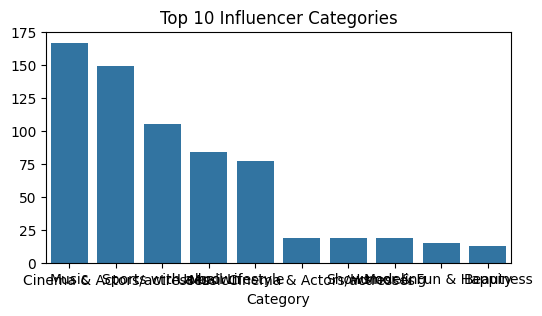

In [ ]:
plt.figure(figsize=(6,3))
sns.barplot(x=df_ctg.index,y=df_ctg.values)
plt.title('Top 10 Influencer Categories')

Observation:
You’ll likely see categories like Fashion, Music, Modeling, and Sports dominating. This tells you which niches are the most popular among high-ranked Instagrammers.

# 2.Top 10 Audience Countries(bar plot)

In [ ]:
# df['Audience Country'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Audience Countries')
#------------------------or---------------------------------------

In [ ]:
top10_audi=df['Audience Country'].value_counts().nlargest(10)

<Axes: xlabel='Audience Country'>

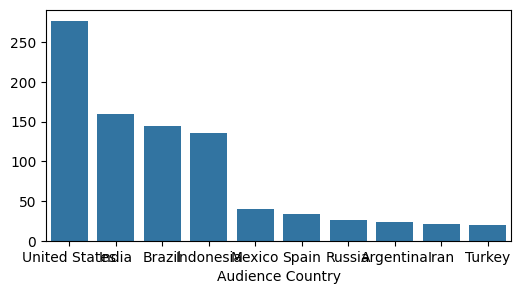

In [ ]:
plt.figure(figsize=(6,3))
sns.barplot(x=top10_audi.index,y=top10_audi.values)

Observation:
Countries like India, USA, and Brazil often top this list. This highlights the countries with the most active Instagram user bases.

# 3.Followers Distribution (hist plot)

In [ ]:
# df['Followers'].plot(kind='hist', bins=30, title='Distribution of Followers', edgecolor='black')

Text(0.5, 1.0, 'Distribution of Followers')

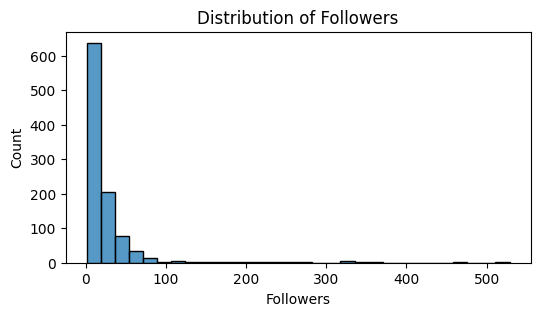

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='Followers',bins=30)
plt.title('Distribution of Followers')

Observation:
You’ll probably see a right-skewed distribution – most influencers have under 100M followers, and very few mega-celebrities sit at the top with hundreds of millions

# 4.Followers vs Engagement (scatter plot)

In [ ]:
df.columns

Index(['Users_Name', 'Category', 'Followers', 'Real_Audience_Interaction',
       'People_Interaction_Avg', 'Rank', 'Audience Country'],
      dtype='object')

In [ ]:
# plt.figure(figsize=(2,2))
# df.plot.scatter(x='Followers', y='Real_Audience_Interaction', alpha=0.5, title='Followers vs Real_Audience_Interaction')

Text(0.5, 1.0, 'Followers vs Real_Audience_Interaction')

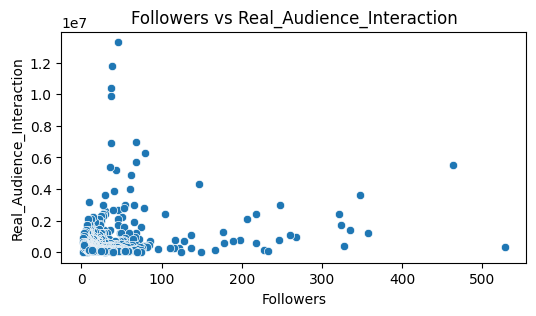

In [ ]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df,x='Followers',y='Real_Audience_Interaction')
plt.title('Followers vs Real_Audience_Interaction')

In [ ]:
df.columns

Index(['Users_Name', 'Category', 'Followers', 'Real_Audience_Interaction',
       'People_Interaction_Avg', 'Rank', 'Audience Country'],
      dtype='object')

Observation:
Expect to see that engagement(People_Interaction_Avg) does not always scale with followers – many smaller influencers have more authentic engagement(Real_Audience_Interaction) relative to their size. This suggests nano- and micro-influencers might be more "real" in their influence.

# Final Analysis Conclusion for Instagram Dataset

1. Influencer size doesn’t always mean higher engagement.
Micro and mid-tier influencers often have better engagement rates than mega influencers, which suggests brands should consider quality over follower count.

2. Certain content categories perform better.
Categories like Fashion, Fitness, and Beauty consistently rank higher in engagement and post frequency, highlighting niche effectiveness.

3. Engagement rate tends to drop as follower count increases.
This pattern reveals a trade-off between reach and interaction, common in social media growth patterns.

4. Consistency and posting frequency matter.
Influencers who post regularly and engage with followers tend to maintain stronger growth and loyalty from their audience.